<h1><strong><center>Machine Learning for Data Analytics </center></strong></h1>

<a id='Index'></a>
<h1>Table of content:</h1>
<font size="4">
    <ul>    
        <li>Introduction</li>
        <li>Environment and Packages</li>
        <li>Dataset Summary, Analysis and Cleaning</li>
        <ul><li>General Summary</li>
            <li>Data Cleaning and Visualization</li></ul>
        <li>Implementation</li>
        <ul><li>Model Baseline</li>
            <li>Model1</li>
            <li>Similar Models Scores</li>
            <li>Model2</li>
            <li>Model3</li>
            <li>Similar Models Scores</li>
            <li>Model4</li>
            <li>Model5</li>
            <li>Similar Models Scores</li>
            <li>Final Model</li></ul>
        <li>Model Predictions</li>
        <li>Reflections and Conclusion</li>
</font>         

# ***Introduction***
---


Kannada is one of the Dravidian languages spoken predominantly by people in southwestern India, especially in the state of Karnataka, with nearly 60 million speakers worldwide.
The objective of this task is to predict the hand-written Kannada digits (0 to 9).

The Train dataset contains 60.000 28x28 pixels grayscale images of different Kannada digits with the correct label associated with the image. Each pixel has a single pixel-value (0-255) associated with it; thus, the higher the value, the darker the pixel. 
The dataset is a subset of the data that was published in: Prabhu, Vinay Uday. "Kannada-MNIST: A new hand-written digits dataset for the Kannada language." As described in the article, the images included in the dataset were cleaned-cured by applying Gaussian-blur filter, adaptive thresholding, colour inversion, centring, chopping and other techniques.





![title](https://www.researchgate.net/profile/Ravindra_Hegadi/publication/274248237/figure/fig1/AS:391846011392003@1470434777393/Kannada-digits-their-equivalent-english-digits.png)


# ***Environment and Packages***
---



<ul><li>Python version: Python 3.X
<li>Packages used:
<ul><li>Sys</li>
  <li>Pandas: Data Analysis and Manipulation tool - Open source Python Data Analysis Library</li>
  <li>Seaborn: Main Plotting tool</li>
  <li>Matplotlib.pyplot: Plotting tool</li>
  <li>Numpy: Used for data manipulation</li>
  <li>scipy.stats: Statistical functions</li>
  <li>Sklearn: machine learning library </li>
  <li>tensorflow: Open source AI library</li>
  <li>Keras:  Open source neural-network library</li></ul>

In [1]:
import sys
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import sklearn
from sklearn.linear_model import Perceptron
from google.colab import files
%tensorflow_version 2.x
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split  
from keras.preprocessing.image import ImageDataGenerator

Using TensorFlow backend.


In [0]:
seed = 0
np.random.seed(seed)

In [3]:
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"diego2638","key":"e4033e5b0072b8d788ab77c8a6bb397d"}'}

In [0]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/kaggle.json
!chmod 600 /root/.kaggle/kaggle.json

# ***Dataset Summary, Analysis and Cleaning***
---



## Load dataset from kaggle



In [5]:
!kaggle competitions download -c cs98x-kannada-mnist --force

  0% 0.00/1.79M [00:00<?, ?B/s]
100% 1.79M/1.79M [00:00<00:00, 125MB/s]
  0% 0.00/9.92M [00:00<?, ?B/s]
100% 9.92M/9.92M [00:00<00:00, 163MB/s]


In [6]:
!unzip "/content/training.csv.zip"
!unzip "/content/test.csv.zip"

Archive:  /content/training.csv.zip
  inflating: training.csv            
Archive:  /content/test.csv.zip
  inflating: test.csv                


In [0]:
#Load datasets
Train_Dataset = pd.read_csv("/content/training.csv", low_memory=False)
Test_Dataset = pd.read_csv("/content/test.csv", low_memory=False)


## Dataset Summary
*First of all, an insight of both datasets are performed in order to obtain some basic information such as dimensions, features, datatypes and descriptive statistics of the dataset.*

### Dataset shapes

In [8]:
print('Train Dataset shape: rows =',Train_Dataset.shape[0], ' - columns =',Train_Dataset.shape[1])
print('Test_Dataset shape: rows =',Test_Dataset.shape[0], ' - columns =',Test_Dataset.shape[1])

Train Dataset shape: rows = 60000  - columns = 786
Test_Dataset shape: rows = 10000  - columns = 785


### A glimpse of some random rows

In [9]:
  Train_Dataset.sample(3)

,id,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,...,pixel744,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
3048,3049,8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
19563,19564,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
58303,58304,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [10]:
Test_Dataset.sample(3)

,id,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,...,pixel744,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
6154,66155,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5047,65048,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7004,67005,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


###  Descriptive statistics for both dataset

In [11]:
Test_Dataset.describe()

,id,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,...,pixel744,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
count,10000.00000,10000.0,10000.0,10000.0,10000.0,10000.0,10000.000000,10000.000000,10000.0,10000.0000,10000.000000,10000.000000,10000.00000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.0,10000.0,10000.0000,10000.0000,10000.0,10000.0,10000.0,10000.0,10000.0000,10000.0,10000.0,10000.0,10000.0000,10000.0,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,...,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0000,10000.0000,10000.0000,10000.0000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.0000,10000.000000,10000.000000,10000.0000,10000.0,10000.00000,10000.0,10000.0,10000.0,10000.0,10000.0
mean,65000.50000,0.0,0.0,0.0,0.0,0.0,0.046500,0.023600,0.0,0.0255,0.025600,0.075700,0.22620,0.30630,0.156300,0.077700,0.036200,0.026300,0.026000,0.0,0.0,0.0061,0.0121,0.0,0.0,0.0,0.0,0.0174,0.0,0.0,0.0,0.0204,0.0,0.040500,0.041200,0.136800,0.071800,0.231600,0.656000,1.56960,...,0.291000,0.434900,0.659700,1.024700,0.88100,0.346500,0.208600,0.047300,0.057400,0.0,0.0,0.0,0.0,0.0,0.0255,0.0134,0.0255,0.0127,0.045900,0.025500,0.048300,0.143900,0.202500,0.199600,0.235800,0.166500,0.027400,0.01060,0.043000,0.0159,0.016900,0.070600,0.0042,0.0,0.05980,0.0,0.0,0.0,0.0,0.0
std,2886.89568,0.0,0.0,0.0,0.0,0.0,2.961016,1.718353,0.0,2.5500,2.550019,3.678549,5.90594,7.29098,5.485005,3.543941,2.130104,2.083133,1.527468,0.0,0.0,0.6100,1.2100,0.0,0.0,0.0,0.0,1.7400,0.0,0.0,0.0,2.0400,0.0,2.863718,2.913272,5.187039,4.128747,7.175703,11.613654,18.21491,...,7.399986,8.975846,10.973593,14.567069,13.98979,8.597862,6.979739,2.961814,3.348018,0.0,0.0,0.0,0.0,0.0,2.5500,1.3400,2.5500,1.2700,3.265434,2.102734,2.951853,5.311404,6.818837,6.809508,7.051125,5.836916,1.991744,1.02078,2.873948,1.5900,1.104869,4.104059,0.4200,0.0,3.49712,0.0,0.0,0.0,0.0,0.0
min,60001.00000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0000,0.0000,0.0,0.0,0.0,0.0,0.0000,0.0,0.0,0.0,0.0000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0000,0.0000,0.0000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.0000,0.000000,0.000000,0.0000,0.0,0.00000,0.0,0.0,0.0,0.0,0.0
25%,62500.75000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0000,0.0000,0.0,0.0,0.0,0.0,0.0000,0.0,0.0,0.0,0.0000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0000,0.0000,0.0000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.0000,0.000000,0.000000,0.0000,0.0,0.00000,0.0,0.0,0.0,0.0,0.0
50%,65000.50000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0000,0.0000,0

In [12]:
Train_Dataset.describe()

,id,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,...,pixel744,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
count,60000.000000,60000.000000,60000.0,60000.0,60000.0,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.00000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.0,60000.0,60000.0,60000.0,60000.0,60000.0,60000.0,60000.000000,60000.0,60000.0,60000.0,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,...,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.0,60000.0,60000.0,60000.0,60000.0,60000.0,60000.0,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.00000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.0
mean,30000.500000,4.500000,0.0,0.0,0.0,0.003350,0.002700,0.008817,0.029467,0.042017,0.075933,0.115883,0.176117,0.24455,0.222183,0.205267,0.129350,0.051617,0.022217,0.010200,0.005383,0.004500,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.002900,0.0,0.0,0.0,0.003350,0.003400,0.004367,0.053050,0.142250,0.286950,0.691500,...,0.927767,0.571633,0.469783,0.525783,0.370483,0.278017,0.144767,0.056617,0.027383,0.013667,0.006800,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.008500,0.050633,0.145167,0.215550,0.362900,0.408600,0.415833,0.424733,0.405717,0.303267,0.123933,0.057250,0.017467,0.013183,0.017400,0.02570,0.015617,0.008183,0.003783,0.003400,0.002717,0.0
std,17320.652413,2.872305,0.0,0.0,0.0,0.820579,0.661362,1.474271,2.700491,2.918309,3.993023,4.795036,5.874145,7.06010,6.652400,6.195649,5.053904,3.016660,2.088539,1.128635,0.938511,0.780784,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.710352,0.0,0.0,0.0,0.820579,0.832827,0.854689,3.512156,5.652343,7.745724,11.982185,...,13.285810,10.345211,9.184474,10.524802,8.894604,7.845722,5.752243,3.650589,2.387222,1.673836,1.177785,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.472231,3.499396,5.680598,6.666483,8.808337,9.385912,9.496864,9.584616,9.389786,7.937053,4.885612,3.179446,1.650426,1.788061,1.659641,2.21439,1.920868,1.225551,0.926724,0.832827,0.665445,0.0
min,1.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
25%,15000.750000,2.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000

*Labels(Target) in the Train_Dataset*

In [13]:
Train_Dataset['label'].unique()

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

## Data preprocessing and visualization.

Samples for each digit with its corresponding pixel values distribution


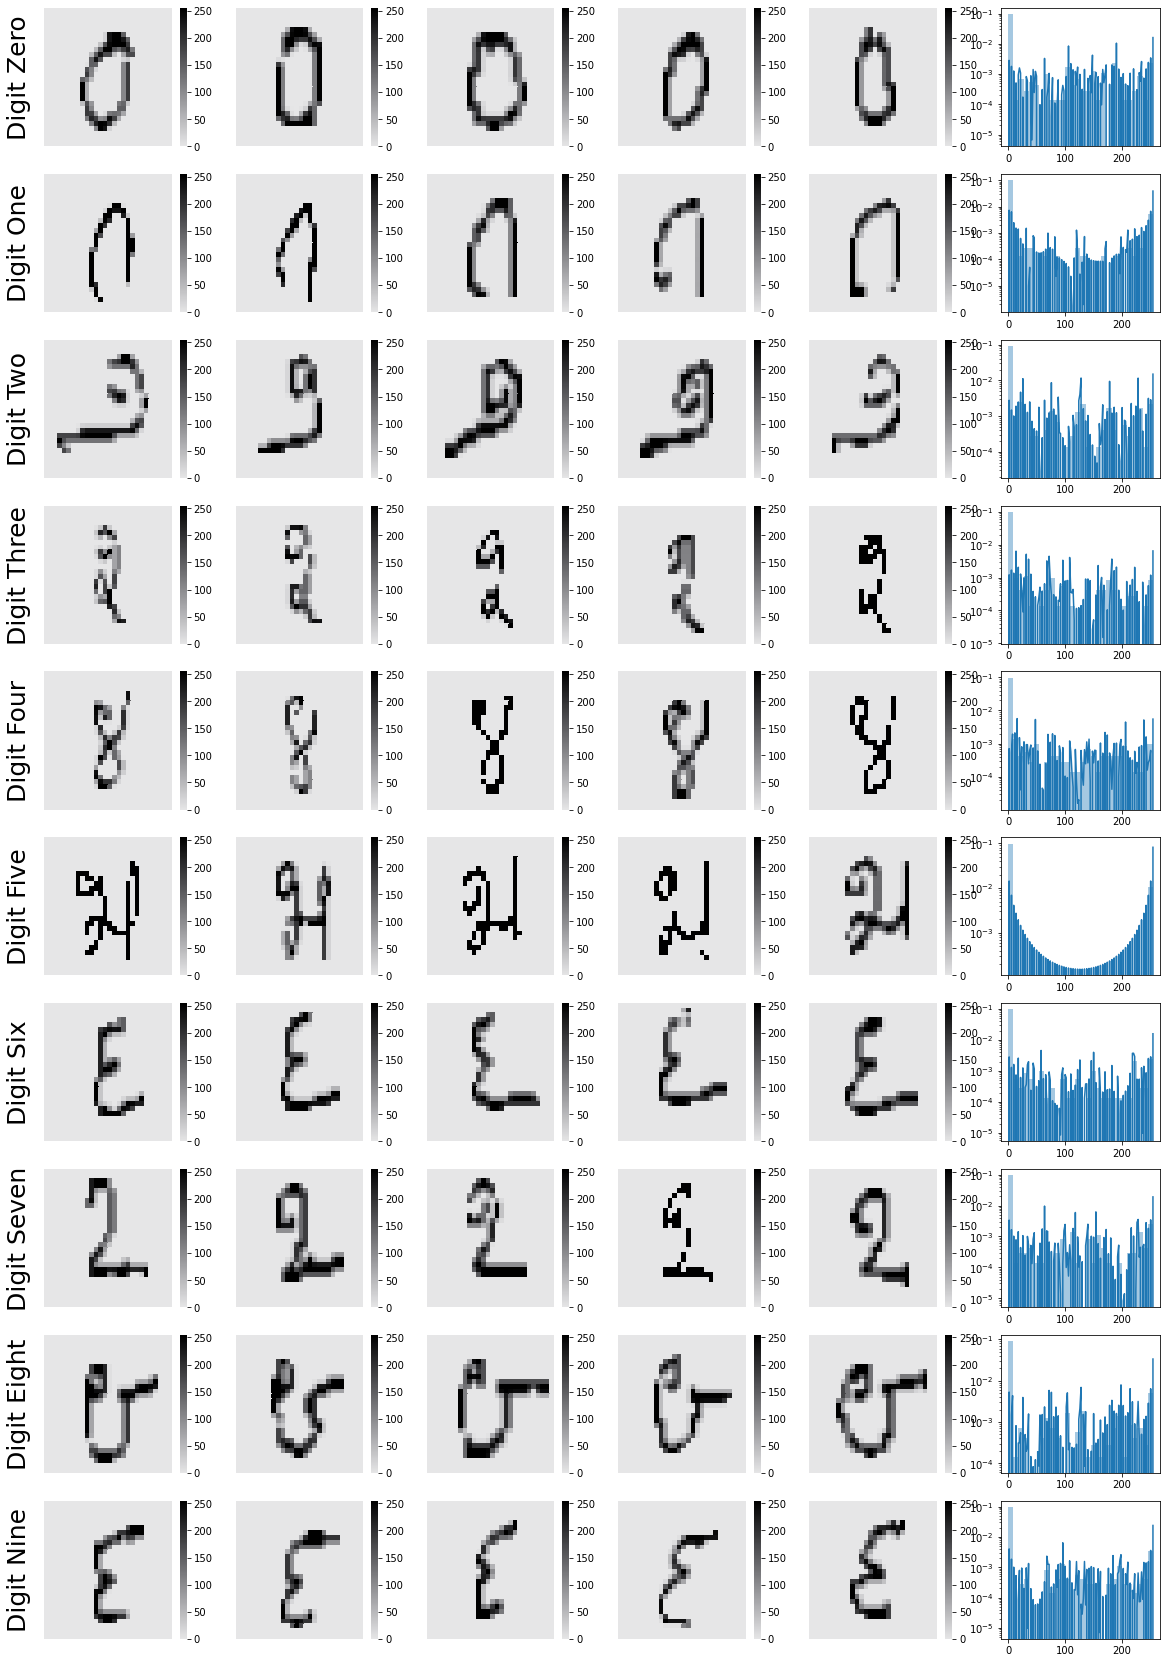

In [14]:
print('Samples for each digit with its corresponding pixel values distribution')
f,axes = plt.subplots(10,6,figsize=(20,30),sharex=False)
rows = ['Digit Zero','Digit One','Digit Two','Digit Three','Digit Four','Digit Five','Digit Six','Digit Seven','Digit Eight','Digit Nine']
for ax, row in zip(axes[:,0], rows):
    ax.annotate(row, xy=(0, 0.5), xytext=(-ax.yaxis.labelpad - 5, 0),
                xycoords=ax.yaxis.label, textcoords='offset points',
                size=25, ha='right', va='center', rotation=90)
    
cmap = sns.cubehelix_palette(50, hue=0.05, rot=0, light=0.9, dark=0, as_cmap=True)
for i in range(10):
  images = (Train_Dataset[Train_Dataset['label'] == i][:5]).reset_index(drop=True)
  for j in range(5):
    aux = images.loc[j][2::].values
    aux = aux.reshape(28,28)
    ax = sns.heatmap(aux, linewidth=0, xticklabels=False, yticklabels=False,cmap=cmap,ax=axes[i,j])
  a = sns.distplot(images.loc[0][2::].values,ax=axes[i,5])
  a.set_yscale("log")


## Visualize target distribution in the training dataset

Text(0.5, 1.0, 'Digit distribution within Training Dataset')

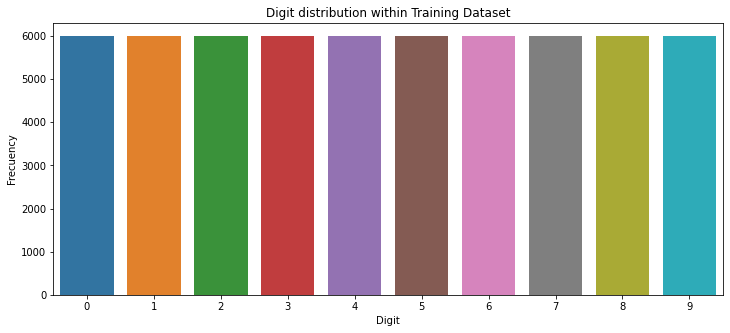

In [15]:
f, axes = plt.subplots(figsize=(12, 5))
ax = sns.barplot(Train_Dataset.label.value_counts().index,Train_Dataset.label.value_counts())
ax.set_xlabel('Digit')
ax.set_ylabel('Frecuency')
ax.set_title('Digit distribution within Training Dataset')

*The Targets is distributed equally over the training dataset, meaning that the dataset is balanced. Aprox 6000 samples per digit*

## Pixel value normalization
*The pixel values for each digits ranges between 0 and 255. Neural networks start computing with small weights values, meaning that if the inputs fed into the NN contains big numbers, its learning speed will be reduced. In order to avoid this problem, all the pixel values ar normalized to [0-1] by dividing the corresponding pixel value by 255 (highest pixel value).*

In [0]:
Train_Dataset =Train_Dataset/ 255.0
Train_Dataset['label']=Train_Dataset['label']*255.0
Test_Dataset =Test_Dataset/ 255.0

## Convert target into categorical
*Target are encoded by one hot encoding using the keras 'to_categorical()' library.*

In [0]:
Y= Train_Dataset['label'].values
Train_Dataset.drop(['label','id'],axis=1,inplace=True)
X =  Train_Dataset.values
Test_Dataset.drop(['id'],axis=1,inplace=True)
n_classes = 10
Y = keras.utils.to_categorical(Y, n_classes)

## Splitting train val and test
*The dataset is splitted into Train, validation and test dataset. The validation set is use to compute early stopping on when fitting the model using the train set. After the model is trained, it is evaluated using the test dataset.*

In [0]:
X_train1, X_test, y_train1, y_test = train_test_split(X, Y,test_size=0.15,random_state=0)
X_train, X_val, y_train, y_val = train_test_split(X_train1, y_train1,test_size=0.20,random_state=0)

## Other preprocessing steps
*To avoid overfitting when creating more complex models (for example including CNN), the dataset went through these preprocessing steps*
### Reshape
*The data (vector of 748 pixels) is reshaped into an image of 28x28 pixels in order to make the CNN efective.*
### Data generation
*To avoid the risk of overfitting, more training data is generated by applying some pre-defined random transformations. In this case, we decided to apply only random rotation (ranged from -10 to 10 degrees) to the images. This decision was backed by the fact that the dataset was already transformed (cleaned, cured,centring, and so forth).*

# ***Implementation***
---

## Model Baseline
*Before thinking about creating complex Deep Learning Model, we must establish a baseline. Usually, this baseline is based on the performance of a simple Model or a simple solution which allows us to compare the performance of more complex solutions. The baseline we chose is a simple Neural network with only two hidden layers: the first hidden layer with 1100 neurons (some more neurons than inputs in order to capture more features), the second layer contains fewer numbers of neurons (400), and finally the output layer consist on ten neurons (1 for each category). The activation functions used for the baseline are sigmoid; the final layer uses a softmax activation function. Finally the loss function is defined as a -log likely (categorical_crossentropy), which works really well with a softmax output. (combinations used for all the models presented below are meant to  improve the learning speed) The weights and bias are initialized as a Gaussian distribution with mean=0 and std=1/sqrt(number_of_inputs); this is constant for all models developed as is a useful initializer for most activation functions (for models which uses ELU as activation function, the weight and bias are initialized using he_normal).*


In [0]:
#BASELINE MODEL
layer1_initial = keras.initializers.RandomNormal(mean=0.0, stddev=1/np.sqrt(len(X_train[0])),seed=0)
layer1_initia2 = keras.initializers.RandomNormal(mean=0.0, stddev=1/np.sqrt(1100),seed=0)
layer1_bl = keras.initializers.RandomNormal(mean=0.0, stddev=1/np.sqrt(len(X_train[0])),seed=0)
layer1_b2 = keras.initializers.RandomNormal(mean=0.0, stddev=1/np.sqrt(1100),seed=0)
baseline = keras.models.Sequential([
                                keras.layers.Dense(1100,activation='sigmoid',kernel_initializer=layer1_initial, bias_initializer=layer1_bl),
                                keras.layers.Dense(400,activation='sigmoid',kernel_initializer=layer1_initia2, bias_initializer=layer1_b2),     
                                keras.layers.Dense(10,activation='softmax')
])
baseline.compile(loss="categorical_crossentropy", optimizer="sgd", metrics=["accuracy"])
history = baseline.fit(X_train, y_train,batch_size=8, epochs=15, validation_data=(X_val, y_val))

Train on 40800 samples, validate on 10200 samples
Epoch 1/15
40800/40800 [==============================] - 14s 337us/sample - loss: 1.6110 - accuracy: 0.5238 - val_loss: 0.7523 - val_accuracy: 0.8038
Epoch 2/15
40800/40800 [==============================] - 13s 329us/sample - loss: 0.4971 - accuracy: 0.8800 - val_loss: 0.3640 - val_accuracy: 0.8989
Epoch 3/15
40800/40800 [==============================] - 14s 332us/sample - loss: 0.3330 - accuracy: 0.9080 - val_loss: 0.2877 - val_accuracy: 0.9204
Epoch 4/15
40800/40800 [==============================] - 14s 336us/sample - loss: 0.2889 - accuracy: 0.9198 - val_loss: 0.2646 - val_accuracy: 0.9219
Epoch 5/15
40800/40800 [==============================] - 13s 324us/sample - loss: 0.2666 - accuracy: 0.9238 - val_loss: 0.2542 - val_accuracy: 0.9285
Epoch 6/15
40800/40800 [==============================] - 13s 326us/sample - loss: 0.2527 - accuracy: 0.9292 - val_loss: 0.2439 - val_accuracy: 0.9282
Epoch 7/15
40800/40800 [====================

### Accuracy-Loss curve from training dataset and validation dataset

(0.0, 1.1)

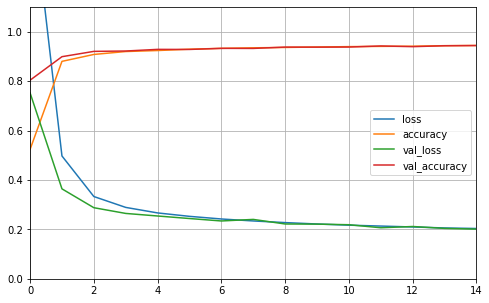

In [0]:
pd.DataFrame(history.history).plot(figsize=(8, 5)) 
plt.grid(True)
plt.gca().set_ylim(0, 1.1) 

In [0]:
Error = baseline.evaluate(X_val, y_val, verbose=0)
print("Baseline Validation Error: %.2f%%" % (100-Error[1]*100))
Error = baseline.evaluate(X_test, y_test, verbose=0)
print("Baseline Test Error: %.2f%%" % (100-Error[1]*100))
print('90% accuracy from Kaggle')

Baseline Validation Error: 5.60%
Baseline Test Error: 5.88%
90% accuracy from Kaggle


### Accuracy per digit

In [0]:
x0,x1,x2,x3,x4,x5,x6,x7,x8,x9=0,0,0,0,0,0,0,0,0,0
x0T,x1T,x2T,x3T,x4T,x5T,x6T,x7T,x8T,x9T=0,0,0,0,0,0,0,0,0,0
test_pred = baseline.predict_classes(X_test)
for i in range(len(y_test)):
  if np.argmax(y_test[i], axis=0) == 0:
    x0T+=1
    if test_pred[i] == 0:
      x0+=1
  elif np.argmax(y_test[i], axis=0) == 1:
    x1T+=1
    if test_pred[i] == 1:
      x1+=1
  elif np.argmax(y_test[i], axis=0) == 2:
    x2T+=1
    if test_pred[i] == 2:
      x2+=1
  elif np.argmax(y_test[i], axis=0) == 3:
    x3T+=1
    if test_pred[i] == 3:
      x3+=1
  elif np.argmax(y_test[i], axis=0) == 4:
    x4T+=1
    if test_pred[i] == 4:
      x4+=1
  elif np.argmax(y_test[i], axis=0) == 5:
    x5T+=1
    if test_pred[i] == 5:
      x5+=1
  elif np.argmax(y_test[i], axis=0) == 6:
    x6T+=1
    if test_pred[i] == 6:
      x6+=1
  elif np.argmax(y_test[i], axis=0) == 7:
    x7T+=1
    if test_pred[i] == 7:
      x7+=1
  elif np.argmax(y_test[i], axis=0) == 8:
    x8T+=1
    if test_pred[i] == 8:
      x8+=1
  elif np.argmax(y_test[i], axis=0) == 9:
    x9T+=1
    if test_pred[i] == 9:
      x9+=1
print("Baseline Accuracy Classifing '0': %.2f%%" % (100*x0/(x0T)))
print("Baseline Accuracy Classifing '1': %.2f%%" % (100*x1/(x1T)))
print("Baseline Accuracy Classifing '2': %.2f%%" % (100*x2/(x2T)))
print("Baseline Accuracy Classifing '3': %.2f%%" % (100*x3/(x3T)))
print("Baseline Accuracy Classifing '4': %.2f%%" % (100*x4/(x4T)))
print("Baseline Accuracy Classifing '5': %.2f%%" % (100*x5/(x5T)))
print("Baseline Accuracy Classifing '6': %.2f%%" % (100*x6/(x6T)))
print("Baseline Accuracy Classifing '7': %.2f%%" % (100*x7/(x7T)))
print("Baseline Accuracy Classifing '8': %.2f%%" % (100*x8/(x8T)))
print("Baseline Accuracy Classifing '9': %.2f%%" % (100*x9/(x9T)))


Baseline Accuracy Classifing '0': 93.35%
Baseline Accuracy Classifing '1': 97.93%
Baseline Accuracy Classifing '2': 97.79%
Baseline Accuracy Classifing '3': 89.14%
Baseline Accuracy Classifing '4': 95.45%
Baseline Accuracy Classifing '5': 95.41%
Baseline Accuracy Classifing '6': 93.74%
Baseline Accuracy Classifing '7': 86.36%
Baseline Accuracy Classifing '8': 96.78%
Baseline Accuracy Classifing '9': 95.06%


###  Confusion matrix to visualize the misclassified classes

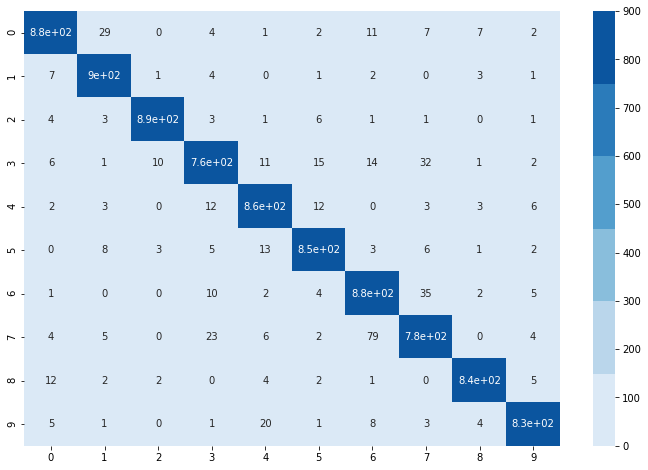

In [0]:
conf= sklearn.metrics.confusion_matrix(np.argmax(y_test, axis=1),test_pred)
conf=pd.DataFrame(conf,index=range(0,10),columns=range(0,10))
plt.figure(figsize=(12,8))
color = sns.color_palette("Blues")
sns.heatmap(conf, annot=True,cmap=color)

*The most common mistakes is classify  6 as 7,  7 as 6, 3 as 7, 7 as 3 and 0 as 1*

## Model 1
The model is an small improvement of the baseline by changing its activator to a more robust one (RELU: rectified linear unit) and including early stopping to avoid overfitting

In [0]:
np.random.seed(seed=0)
layer1_initial = keras.initializers.RandomNormal(mean=0.0, stddev=1/np.sqrt(len(X_train[0])),seed=0)
layer1_initia2 = keras.initializers.RandomNormal(mean=0.0, stddev=1/np.sqrt(1100),seed=0)
layer1_bl = keras.initializers.RandomNormal(mean=0.0, stddev=1/np.sqrt(len(X_train[0])),seed=0)
layer1_b2 = keras.initializers.RandomNormal(mean=0.0, stddev=1/np.sqrt(1100),seed=0)
model1 = keras.models.Sequential([
                                keras.layers.Dense(1100,activation='relu',kernel_initializer=layer1_initial, bias_initializer=layer1_bl),
                                keras.layers.Dense(400,activation='relu',kernel_initializer=layer1_initia2, bias_initializer=layer1_b2),     
                                keras.layers.Dense(10,activation='softmax')
])
model1.compile(loss="categorical_crossentropy", optimizer="sgd", metrics=["accuracy"])
early_stop = keras.callbacks.EarlyStopping(patience=5, restore_best_weights=True)
check_point = keras.callbacks.ModelCheckpoint('model',save_best_only=True)
history = model1.fit(X_train, y_train,batch_size=8, epochs=40, validation_data=(X_val, y_val),callbacks=[check_point,early_stop],verbose=0)

INFO:tensorflow:Assets written to: model/assets
INFO:tensorflow:Assets written to: model/assets
INFO:tensorflow:Assets written to: model/assets
INFO:tensorflow:Assets written to: model/assets
INFO:tensorflow:Assets written to: model/assets
INFO:tensorflow:Assets written to: model/assets
INFO:tensorflow:Assets written to: model/assets
INFO:tensorflow:Assets written to: model/assets
INFO:tensorflow:Assets written to: model/assets
INFO:tensorflow:Assets written to: model/assets
INFO:tensorflow:Assets written to: model/assets


In [0]:
Error = model1.evaluate(X_val, y_val, verbose=0)
print("Model1 Validation Error: %.2f%%" % (100-Error[1]*100))
Error = model1.evaluate(X_test, y_test, verbose=0)
print("Model1 Test Error: %.2f%%" % (100-Error[1]*100))

Model1 Validation Error: 2.21%
Model1 Test Error: 2.46%


(0.0, 1.1)

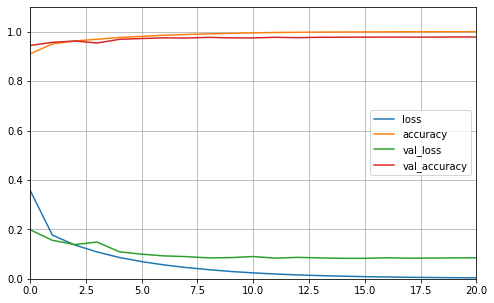

In [0]:
pd.DataFrame(history.history).plot(figsize=(8, 5)) 
plt.grid(True)
plt.gca().set_ylim(0, 1.1) 

*Although the model improve the fitting over the training data with each epoch, the validations scores does not, meaning that the model is overfitting, that is why it is necessary to include early stop when training*

<u>*All the model implemented below (and commented ones) are/were trained using eartly stop*</u>

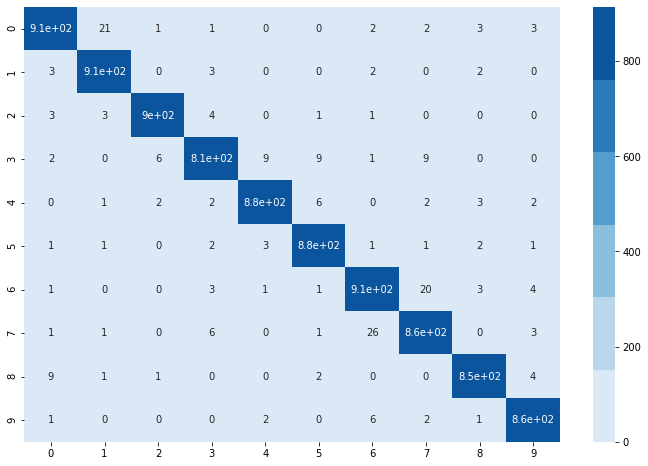

In [0]:
test_pred = model1.predict_classes(X_test)
conf= sklearn.metrics.confusion_matrix(np.argmax(y_test, axis=1),test_pred)
conf=pd.DataFrame(conf,index=range(0,10),columns=range(0,10))
plt.figure(figsize=(12,8))
color = sns.color_palette("Blues")
sns.heatmap(conf, annot=True,cmap=color)

Now is more clear that the most common mistakes are missclasifications between  6 and 7 and classifying 0 as 1 
This modifications shows an important increment in the baseline performance (3% of improvement), but the results are not as good as we espect

## Scores from some of the models created


*   3 Hidden layers (1100,400,400)
*   Activation = Relu
*   Output = Softmax
*   Loss = categorical crossentropy
*   Optimizer = stochastic gradient descent(default parametres)
*   Batch size = 8
*   Epchos = 100
*   Early_stop patience = 10
*   regularizer = None
```
# Validation Error: 2.10%
# Test Error: 2.33%
```
---
*   3 Hidden layers (1100,400,400)
*   Activation = Relu
*   Output = Softmax
*   Loss = categorical crossentropy
*   Optimizer = Adam (default parametres)
*   Batch size = 8
*   Epchos = 100
*   Early_stop patience = 10
*   regularizer = None
```
# Validation Error: 2.25%
# Test Error: 2.36%
```
---
```
# Using regularizer such as L1 and L2 shows worse scores 
```
---
*   3 Hidden layers (1100,400,400)
*   Activation = Relu
*   Output = Softmax
*   Loss = categorical crossentropy
*   Optimizer = stochastic gradient descent(default parametres)
*   Batch size = 8
*   Epchos = 100
*   Early_stop patience = 10
*   regularizer = DropOut (0.5) before each layer
```
# Validation Error: 1.77%
# Test Error: 1.93%
```
---
*   3 Hidden layers (1100,400,400)
*   Activation = Relu
*   Output = Softmax
*   Loss = categorical crossentropy
*   Optimizer = Adam(default parametres)
*   Batch size = 8
*   Epchos = 100
*   Early_stop patience = 10
*   regularizer = DropOut (0.5) before each layer
```
# Validation Error: 2.20%
# Test Error: 2.40%
```
---
*   4 Hidden layers (2000,1000,500,70)
*   Activation = ELU
*   Output = Softmax
*   Loss = categorical crossentropy
*   Optimizer = Adam (default parametres)
*   Batch size = 8
*   Epchos = 100
*   Early_stop patience = 10
*   regularizer = DropOut (0.5) before each layer
```
# Validation Error: 2.3%
# Test Error: 2.26%
```
---
*   3 Hidden layers (1100,400,400)
*   Activation = relu
*   Output = Softmax
*   Loss = categorical crossentropy
*   Optimizer = SGD(learning_rate=0.01, momentum=0.1, decay=1e-5)
*   Batch size = 8
*   Epchos = 100
*   Early_stop patience = 10
*   regularizer = DropOut (0.5) before each layer
```
# Validation Error: 1.52%
# Test Error: 1.57%
```


## Model 2
Simple neural network with the parameters that achieved the best validation and test scores. It shows an improvement of 4.3% over the baseline.

In [0]:
np.random.seed(seed=0)
layer1_initial = keras.initializers.RandomNormal(mean=0.0, stddev=1/np.sqrt(len(X_train[0])),seed=0)
layer1_initia2 = keras.initializers.RandomNormal(mean=0.0, stddev=1/np.sqrt(1100),seed=0)
layer1_bl = keras.initializers.RandomNormal(mean=0.0, stddev=1/np.sqrt(len(X_train[0])),seed=0)
layer1_b2 = keras.initializers.RandomNormal(mean=0.0, stddev=1/np.sqrt(1100),seed=0)
model2 = keras.models.Sequential([
                                keras.layers.Dropout(0.5),
                                keras.layers.Dense(1100,activation='relu',kernel_initializer=layer1_initial, bias_initializer=layer1_bl),
                                keras.layers.Dropout(0.5),
                                keras.layers.Dense(400,activation='relu',kernel_initializer=layer1_initia2, bias_initializer=layer1_b2),  
                                keras.layers.Dropout(0.5),
                                keras.layers.Dense(400,activation='relu',kernel_initializer=layer1_initia2, bias_initializer=layer1_b2),    
                                keras.layers.Dropout(0.5),
                                keras.layers.Dense(10,activation='softmax')
])
model2.compile(loss="categorical_crossentropy", optimizer='sgd', metrics=["accuracy"])
early_stop = keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)
check_point = keras.callbacks.ModelCheckpoint('model',save_best_only=True)
history = model2.fit(X_train, y_train,batch_size=8, epochs=200, validation_data=(X_val, y_val),callbacks=[check_point,early_stop],verbose=0)

INFO:tensorflow:Assets written to: model/assets
INFO:tensorflow:Assets written to: model/assets
INFO:tensorflow:Assets written to: model/assets
INFO:tensorflow:Assets written to: model/assets
INFO:tensorflow:Assets written to: model/assets
INFO:tensorflow:Assets written to: model/assets
INFO:tensorflow:Assets written to: model/assets
INFO:tensorflow:Assets written to: model/assets
INFO:tensorflow:Assets written to: model/assets
INFO:tensorflow:Assets written to: model/assets
INFO:tensorflow:Assets written to: model/assets
INFO:tensorflow:Assets written to: model/assets
INFO:tensorflow:Assets written to: model/assets
INFO:tensorflow:Assets written to: model/assets
INFO:tensorflow:Assets written to: model/assets
INFO:tensorflow:Assets written to: model/assets
INFO:tensorflow:Assets written to: model/assets
INFO:tensorflow:Assets written to: model/assets
INFO:tensorflow:Assets written to: model/assets
INFO:tensorflow:Assets written to: model/assets
INFO:tensorflow:Assets written to: model

In [0]:
Error = model2.evaluate(X_val, y_val, verbose=0)
print("Model2 Validation Error: %.2f%%" % (100-Error[1]*100))
Error = model2.evaluate(X_test, y_test, verbose=0)
print("Model2 Test Error: %.2f%%" % (100-Error[1]*100))

Model2 Validation Error: 1.36%
Model2 Test Error: 1.50%


(0.0, 1.1)

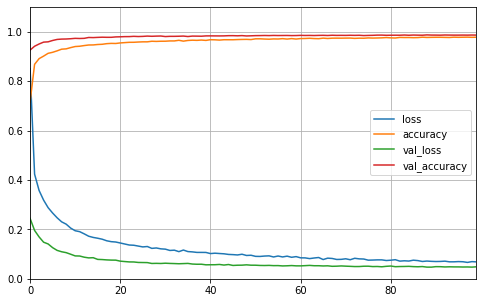

In [0]:
pd.DataFrame(history.history).plot(figsize=(8, 5)) 
plt.grid(True)
plt.gca().set_ylim(0, 1.1) 

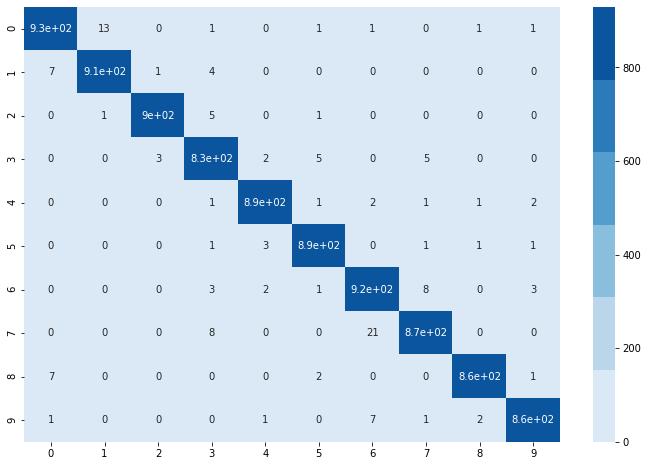

In [0]:
test_pred = model2.predict_classes(X_test)
conf= sklearn.metrics.confusion_matrix(np.argmax(y_test, axis=1),test_pred)
conf=pd.DataFrame(conf,index=range(0,10),columns=range(0,10))
plt.figure(figsize=(12,8))
color = sns.color_palette("Blues")
sns.heatmap(conf, annot=True,cmap=color)

*The model is still misclassifying the 0 as 1 and 6,7 as 7,6 respectively.*

Example of most common misclassification


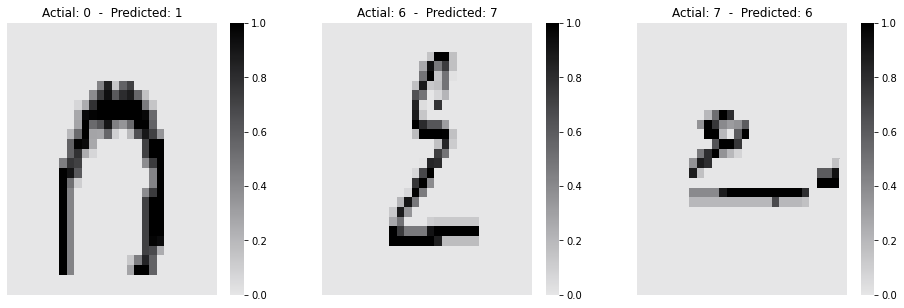

In [0]:
print('Example of most common misclassification')
f,axes = plt.subplots(1,3,figsize=(16,5),sharex=False)
cmap = sns.cubehelix_palette(50, hue=0.05, rot=0, light=0.9, dark=0, as_cmap=True)
for i in range(len(y_test)):
  if np.argmax(y_test[i], axis=0) == 0:
    if test_pred[i] == 1:
      aux = X_test[i]
      aux = aux.reshape(28,28)
      ax = sns.heatmap(aux, linewidth=0, xticklabels=False, yticklabels=False,cmap=cmap,ax=axes[0])
      ax.set_title('Actial: 0  -  Predicted: 1')
      break
      print(i)
for i in range(len(y_test)):
  if np.argmax(y_test[i], axis=0) == 6:
    if test_pred[i] == 7:
      aux = X_test[i]
      aux = aux.reshape(28,28)
      ax = sns.heatmap(aux, linewidth=0, xticklabels=False, yticklabels=False,cmap=cmap,ax=axes[1])
      ax.set_title('Actial: 6  -  Predicted: 7')
      break
      print(i)
for i in range(len(y_test)):
  if np.argmax(y_test[i], axis=0) == 7:
    if test_pred[i] == 6:
      aux = X_test[i]
      aux = aux.reshape(28,28)
      ax = sns.heatmap(aux, linewidth=0, xticklabels=False, yticklabels=False,cmap=cmap,ax=axes[2])
      ax.set_title('Actial: 7  -  Predicted: 6')
      break
      print(i)


![title](https://www.researchgate.net/profile/Ravindra_Hegadi/publication/274248237/figure/fig1/AS:391846011392003@1470434777393/Kannada-digits-their-equivalent-english-digits.png)

In case of the 0 predicted as a 1. Actually the model is predicting correctly (Humans will considerate this digit as a 1). However, regarding the misclassification of the number 6 and 7, these confusions are understandable.


*Although a model has been created that works much better than the baseline, it can still be improved using more complex models (for example, including convolution layers).*

## Model 3
*To increase the performance of our model, we need to create more complex models. The model created include Convolution layers and Pooling layers before processing the information by a fully connected neural network. For this model, we decided to introduce a pooling layer (windows =2) after each convolution layer; and the fully connected layer makes use of dropout regularizer as it shows an essential improvement in the models described above. The first layer is a convolution layer with windows of 3 and a step of 1; it also includes padding and the activation function is relu, (generate 32 filters). As mentioned before, every convolution layer is followed by a pooling layer. After that, it goes through a new convolution layer (same parameters but with 64 filters as output). Finally, It is concatenated with a fully connected layer (2 hidden layers 128 and 64 neurons each respectively with a sigmoid as activation function) and an output layer with ten neurons (1 for each category) using softmax as its activation function. Before each layer, we included dropout as it shows a substantial improvement in the models created above.*
<u>In order to make use of convolution layers, it is necessary to reshape the data as mentioned in the pre-processing stage.</u>

In [0]:
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_val = X_val.reshape(X_val.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

In [0]:
np.random.seed(seed=0)
layer1_initial = keras.initializers.RandomNormal(mean=0.0, stddev=1/np.sqrt(len(X_train[0])),seed=0)
layer1_initia2 = keras.initializers.RandomNormal(mean=0.0, stddev=1/np.sqrt(1100),seed=0)
layer1_bl = keras.initializers.RandomNormal(mean=0.0, stddev=1/np.sqrt(len(X_train[0])),seed=0)
layer1_b2 = keras.initializers.RandomNormal(mean=0.0, stddev=1/np.sqrt(1100),seed=0)
model3 = keras.models.Sequential([
                                keras.layers.Conv2D(filters=32, kernel_size=3, strides=1, padding="SAME", activation="relu"),
                                keras.layers.MaxPool2D(pool_size=2),
                                keras.layers.Conv2D(filters=64, kernel_size=3, strides=1, padding="SAME", activation="relu"),
                                keras.layers.MaxPool2D(pool_size=2),
                                keras.layers.Flatten(),
                                keras.layers.Dense(128,activation='sigmoid',kernel_initializer=layer1_initia2, bias_initializer=layer1_b2),     
                                keras.layers.Dropout(0.5),
                                keras.layers.Dense(64,activation='sigmoid',kernel_initializer=layer1_initia2, bias_initializer=layer1_b2),     
                                keras.layers.Dropout(0.5),
                                keras.layers.Dense(10,activation='softmax')
])
early_stop = keras.callbacks.EarlyStopping(patience=5, restore_best_weights=True)
check_point = keras.callbacks.ModelCheckpoint('model',save_best_only=True)

sgd = keras.optimizers.SGD(lr=0.001, momentum=0.9, nesterov=True)
model3.compile(loss="categorical_crossentropy", optimizer=sgd, metrics=["accuracy"])
history = model3.fit(X_train, y_train,batch_size=8, epochs=200, validation_data=(X_val, y_val),callbacks=[check_point,early_stop])

Train on 40800 samples, validate on 10200 samples
Epoch 1/200
40800/40800 [==============================] - 19s 463us/sample - loss: 2.3400 - accuracy: 0.1039 - val_loss: 2.2942 - val_accuracy: 0.1004
Epoch 2/200
40800/40800 [==============================] - 18s 433us/sample - loss: 1.9749 - accuracy: 0.2755 - val_loss: 1.0233 - val_accuracy: 0.7648
Epoch 3/200
40800/40800 [==============================] - 18s 443us/sample - loss: 0.8005 - accuracy: 0.7466 - val_loss: 0.4094 - val_accuracy: 0.8978
Epoch 4/200
40800/40800 [==============================] - 18s 434us/sample - loss: 0.5428 - accuracy: 0.8360 - val_loss: 0.3132 - val_accuracy: 0.9170
Epoch 5/200
40800/40800 [==============================] - 18s 438us/sample - loss: 0.4460 - accuracy: 0.8710 - val_loss: 0.2489 - val_accuracy: 0.9299
Epoch 6/200
40800/40800 [==============================] - 18s 443us/sample - loss: 0.3747 - accuracy: 0.8967 - val_loss: 0.1943 - val_accuracy: 0.9459
Epoch 7/200
40800/40800 [=============

In [0]:
Error = model3.evaluate(X_val, y_val, verbose=0)
print("Model3 Validation Error: %.2f%%" % (100-Error[1]*100))
Error = model3.evaluate(X_test, y_test, verbose=0)
print("Model3 Test Error: %.2f%%" % (100-Error[1]*100))

Model3 Validation Error: 1.13%
Model3 Test Error: 1.17%


The implementation of this model improve the score over the validation dateset, but it doesn't show any improvement on the test dataset. We can expect that changing the activations function from the dense layers to relu activators increase the performance of the model (as it does with the first models created)

## Model 4

In [0]:
np.random.seed(seed=0)
layer1_initial = keras.initializers.RandomNormal(mean=0.0, stddev=1/np.sqrt(len(X_train[0])),seed=0)
layer1_initia2 = keras.initializers.RandomNormal(mean=0.0, stddev=1/np.sqrt(1100),seed=0)
layer1_bl = keras.initializers.RandomNormal(mean=0.0, stddev=1/np.sqrt(len(X_train[0])),seed=0)
layer1_b2 = keras.initializers.RandomNormal(mean=0.0, stddev=1/np.sqrt(1100),seed=0)
model4 = keras.models.Sequential([
                                keras.layers.Conv2D(filters=32, kernel_size=3, strides=1, padding="SAME", activation="relu"),
                                keras.layers.MaxPool2D(pool_size=2),
                                keras.layers.Conv2D(filters=64, kernel_size=3, strides=1, padding="SAME", activation="relu"),
                                keras.layers.MaxPool2D(pool_size=2),
                                keras.layers.Flatten(),
                                keras.layers.Dense(128,activation='relu',kernel_initializer=layer1_initia2, bias_initializer=layer1_b2),     
                                keras.layers.Dropout(0.5),
                                keras.layers.Dense(64,activation='relu',kernel_initializer=layer1_initia2, bias_initializer=layer1_b2),     
                                keras.layers.Dropout(0.5),
                                keras.layers.Dense(10,activation='softmax')
])
early_stop = keras.callbacks.EarlyStopping(patience=5, restore_best_weights=True)
check_point = keras.callbacks.ModelCheckpoint('model',save_best_only=True)

sgd = keras.optimizers.SGD(lr=0.001, momentum=0.9, nesterov=True)
model4.compile(loss="categorical_crossentropy", optimizer=sgd, metrics=["accuracy"])
history = model4.fit(X_train, y_train,batch_size=8, epochs=200, validation_data=(X_val, y_val),callbacks=[check_point,early_stop])

Train on 40800 samples, validate on 10200 samples
Epoch 1/200
40800/40800 [==============================] - 18s 449us/sample - loss: 0.6751 - accuracy: 0.7810 - val_loss: 0.1374 - val_accuracy: 0.9570
Epoch 2/200
40800/40800 [==============================] - 18s 438us/sample - loss: 0.2127 - accuracy: 0.9399 - val_loss: 0.0871 - val_accuracy: 0.9720
Epoch 3/200
40800/40800 [==============================] - 18s 438us/sample - loss: 0.1555 - accuracy: 0.9557 - val_loss: 0.0716 - val_accuracy: 0.9783
Epoch 4/200
40800/40800 [==============================] - 18s 437us/sample - loss: 0.1231 - accuracy: 0.9654 - val_loss: 0.0613 - val_accuracy: 0.9814
Epoch 5/200
40800/40800 [==============================] - 18s 439us/sample - loss: 0.1079 - accuracy: 0.9702 - val_loss: 0.0553 - val_accuracy: 0.9837
Epoch 6/200
40800/40800 [==============================] - 18s 449us/sample - loss: 0.0949 - accuracy: 0.9724 - val_loss: 0.0482 - val_accuracy: 0.9864
Epoch 7/200
40800/40800 [=============

In [0]:
Error = model4.evaluate(X_val, y_val, verbose=0)
print("Model4 Validation Error: %.2f%%" % (100-Error[1]*100))
Error = model4.evaluate(X_test, y_test, verbose=0)
print("Model4 Test Error: %.2f%%" % (100-Error[1]*100))

Model4 Validation Error: 0.94%
Model4 Test Error: 1.04%


*This model shows a small improvement from the previous model*
*Some more convinations were tryed as show below:*
*Adding noise using keras.gausainnoise as the first layer was used in some model in order to get an insight of how it could make the model more robust but as it wasn't expected, the result of adding a small noise in de image produce a decrement on the model accuracy*


## Scores from some of the models created

* Convolution layer (filters:32, windows:3, step:1, padding:True, activation: relu)
* Pooling layer (windows 2)
* Convolution layer (filters:64, windows:3, step:1, padding:True, activation: relu)
* Pooling layer (windows 2)
* Dense layer (neurons:128, activation: relu)
* Dropout layer (0.5) ### ONLY FOR TRAINING
* Dense layer (neurons:64, activation: relu)
* Dropout layer (0.5) ### ONLY FOR TRAINING
* Dense layer (neurons:10, activation: softmax) ## OUTPUT
* Loss = categorical crossentropy
* Optimizer = stochastic gradient descent(default parametres)
* Batch size = 8
* Epchos = 200
* Early_stop patience = 10
* regularizer = Dropout(0.5)


```
# Validation Error: 1.19%
# Test Error: 1.33%
```
---

* Convolution layer (filters:32, windows:3, step:1, padding:True, activation: relu)
* Pooling layer (windows 2)
* Convolution layer (filters:64, windows:3, step:1, padding:True, activation: relu)
* Pooling layer (windows 2)
* Dense layer (neurons:150, activation: relu)
* Dropout layer (0.5) ### ONLY FOR TRAINING
* Dense layer (neurons:75, activation: relu)
* Dropout layer (0.5) ### ONLY FOR TRAINING
* Dense layer (neurons:10, activation: softmax) ## OUTPUT
* Loss = categorical crossentropy
* Optimizer = stochastic gradient descent(lr=0.001, momentum=0.9)
* Batch size = 8
* Epchos = 200
* Early_stop patience = 10
* regularizer = Dropout(0.5)

```
# Validation Error: 1.03%
# Test Error: 1.2%
```
---
* Convolution layer (filters:32, windows:3, step:1, padding:True, activation: relu)
* Pooling layer (windows 2)
* Convolution layer (filters:64, windows:3, step:1, padding:True, activation: relu)
* Pooling layer (windows 2)
* Dense layer (neurons:200, activation: relu)
* Dropout layer (0.5) ### ONLY FOR TRAINING
* Dense layer (neurons:75, activation: relu)
* Dropout layer (0.5) ### ONLY FOR TRAINING
* Dense layer (neurons:10, activation: softmax) ## OUTPUT
* Loss = categorical crossentropy
* Optimizer = stochastic gradient descent(default parametres)
* Batch size = 8
* Epchos = 200
* Early_stop patience = 10
* regularizer = Dropout(0.5)

```
# Validation Error: 0.94%
# Test Error: 1.02%
```
---
* Convolution layer (filters:32, windows:3, step:1, padding:True, activation: relu)
* Pooling layer (windows 2)
* Convolution layer (filters:64, windows:3, step:1, padding:True, activation: relu)
* Pooling layer (windows 2)
* Dense layer (neurons:200, activation: relu)
* Dropout layer (0.5) ### ONLY FOR TRAINING
* Dense layer (neurons:75, activation: relu)
* Dropout layer (0.5) ### ONLY FOR TRAINING
* Dense layer (neurons:10, activation: softmax) ## OUTPUT
* Loss = categorical crossentropy
* Optimizer = Adam(learning_rate=0.0001, beta_1=0.9, beta_2=0.999)
* Batch size = 8
* Epchos = 200
* Early_stop patience = 10
* regularizer = Dropout(0.5)

```
# Validation Error: 1.07%
# Test Error: 1.13%
```
---
* Convolution layer (filters:32, windows:3, step:1, padding:True, activation: relu)
* Pooling layer (windows 2)
* Convolution layer (filters:64, windows:3, step:1, padding:True, activation: relu)
* Pooling layer (windows 2)
* Dropout layer (0.5) ### ONLY FOR TRAINING
* Dense layer (neurons:200, activation: relu)
* Dropout layer (0.5) ### ONLY FOR TRAINING
* Dense layer (neurons:75, activation: relu)
* Dropout layer (0.5) ### ONLY FOR TRAINING
* Dense layer (neurons:10, activation: softmax) ## OUTPUT
* Loss = categorical crossentropy
* Optimizer = stochastic gradient descent(default parametres)
* Batch size = 8
* Epchos = 200
* Early_stop patience = 10
* regularizer = Dropout(0.5)

```
# Validation Error: 0.81%
# Test Error: 0.82%
```
---
* GaussianNoise(0.05)
* Convolution layer (filters:32, windows:3, step:1, padding:True, activation: relu)
* Pooling layer (windows 2)
* Convolution layer (filters:64, windows:3, step:1, padding:True, activation: relu)
* Pooling layer (windows 2)
* Dropout layer (0.5) ### ONLY FOR TRAINING
* Dense layer (neurons:200, activation: relu)
* Dropout layer (0.5) ### ONLY FOR TRAINING
* Dense layer (neurons:75, activation: relu)
* Dropout layer (0.5) ### ONLY FOR TRAINING
* Dense layer (neurons:10, activation: softmax) ## OUTPUT
* Loss = categorical crossentropy
* Optimizer = stochastic gradient descent(default parametres)
* Batch size = 8
* Epchos = 200
* Early_stop patience = 10
* regularizer = Dropout(0.5)

```
# Validation Error: 0.87%
# Test Error: 0.82%


*Despite getting a minimal error (1%: Validation Error: 0.81%, Test Error: 0.82%) which sounds reasonable, we can try to improve the model based on how CNN works.*
*CNN can detect patterns/features in some locations of the images and from different scales, but it cannot detect these patterns if they are rotated by a certain degree.The idea which could lead to the improvement of the system performance is to add a small rotation (random between -10 and 10 degrees) to each image during the model training (during each epoch), so for each epoch, the image is rotated randomly).*
*By doing that, the model is trained to detect these digit not even if they are slightly rotated or not.*

## Model 5
In this model as mentioned above, the best previous model is trained by adding small rotations for each image

In [0]:
datagen = ImageDataGenerator(rotation_range=10)
datagen.fit(X_train)  

In [0]:
np.random.seed(seed=0)
layer1_initial = keras.initializers.RandomNormal(mean=0.0, stddev=1/np.sqrt(len(X_train[0])),seed=0)
layer1_initia2 = keras.initializers.RandomNormal(mean=0.0, stddev=1/np.sqrt(1100),seed=0)
layer1_bl = keras.initializers.RandomNormal(mean=0.0, stddev=1/np.sqrt(len(X_train[0])),seed=0)
layer1_b2 = keras.initializers.RandomNormal(mean=0.0, stddev=1/np.sqrt(1100),seed=0)
model5 = keras.models.Sequential([
                                keras.layers.Conv2D(filters=32, kernel_size=3, strides=1, padding="SAME", activation="relu"),
                                keras.layers.Conv2D(filters=64, kernel_size=3, strides=1, padding="SAME", activation="relu"),
                                keras.layers.MaxPool2D(pool_size=2),
                                keras.layers.Flatten(),    
                                keras.layers.Dropout(0.5),
                                keras.layers.Dense(200,activation='relu',kernel_initializer=layer1_initia2, bias_initializer=layer1_b2),     
                                keras.layers.Dropout(0.5),
                                keras.layers.Dense(75,activation='relu',kernel_initializer=layer1_initia2, bias_initializer=layer1_b2),      
                                keras.layers.Dropout(0.5),
                                keras.layers.Dense(10,activation='softmax')
])
early_stop = keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)
check_point = keras.callbacks.ModelCheckpoint('model',save_best_only=True)

#adam = keras.optimizers.Adam(learning_rate=0.0001, beta_1=0.9, beta_2=0.999, amsgrad=False)
model5.compile(loss="categorical_crossentropy", optimizer='sgd', metrics=["accuracy"])

with keras.backend.learning_phase_scope(1):
  history = model5.fit(datagen.flow(X_train, y_train,batch_size=8),  steps_per_epoch = len(X_train)//8,epochs=200, validation_data=(X_val, y_val),callbacks=[check_point,early_stop])


Train for 5100 steps, validate on 10200 samples
Epoch 1/200
5100/5100 [==============================] - 26s 5ms/step - loss: 0.7167 - accuracy: 0.7657 - val_loss: 0.1873 - val_accuracy: 0.9446
Epoch 2/200
5100/5100 [==============================] - 26s 5ms/step - loss: 0.3271 - accuracy: 0.9029 - val_loss: 0.1181 - val_accuracy: 0.9649
Epoch 3/200
5100/5100 [==============================] - 26s 5ms/step - loss: 0.2351 - accuracy: 0.9319 - val_loss: 0.0903 - val_accuracy: 0.9736
Epoch 4/200
5100/5100 [==============================] - 26s 5ms/step - loss: 0.1866 - accuracy: 0.9454 - val_loss: 0.0768 - val_accuracy: 0.9774
Epoch 5/200
5100/5100 [==============================] - 26s 5ms/step - loss: 0.1574 - accuracy: 0.9538 - val_loss: 0.0660 - val_accuracy: 0.9796
Epoch 6/200
5100/5100 [==============================] - 26s 5ms/step - loss: 0.1409 - accuracy: 0.9588 - val_loss: 0.0599 - val_accuracy: 0.9813
Epoch 7/200
5100/5100 [==============================] - 26s 5ms/step - loss

In [0]:
Error = model5.evaluate(X_val, y_val, verbose=0)
print("model5 Validation Error: %.2f%%" % (100-Error[1]*100))
Error = model5.evaluate(X_test, y_test, verbose=0)
print("model5 Test Error: %.2f%%" % (100-Error[1]*100))

model5 Validation Error: 0.91%
model5 Test Error: 0.73%


## Scores from some of the models created

* GaussianNoise(0.05)
* Convolution layer (filters:32, windows:3, step:1, padding:True, activation: relu)
* Pooling layer (windows 2)
* Convolution layer (filters:64, windows:3, step:1, padding:True, activation: relu)
* Pooling layer (windows 2)
* Dense layer (neurons:200, activation: relu)
* Dropout layer (0.5) ### ONLY FOR TRAINING
* Dense layer (neurons:75, activation: relu)
* Dropout layer (0.5) ### ONLY FOR TRAINING
* Dense layer (neurons:10, activation: softmax) ## OUTPUT
* Loss = categorical crossentropy
* Optimizer = stochastic gradient descent(default parametres)
* Batch size = 8
* Epchos = 200
* Early_stop patience = 10
* regularizer = Dropout(0.5)
* image rotation 10 degree

```
# Validation Error: 0.84%
# Test Error: 0.73%
```
---
* GaussianNoise(0.05)
* Convolution layer (filters:32, windows:3, step:1, padding:True, activation: relu)
* Convolution layer (filters:64, windows:3, step:1, padding:True, activation: relu)
* Pooling layer (windows 2)
* Dense layer (neurons:200, activation: relu)
* Dropout layer (0.5) ### ONLY FOR TRAINING
* Dense layer (neurons:75, activation: relu)
* Dropout layer (0.5) ### ONLY FOR TRAINING
* Dense layer (neurons:10, activation: softmax) ## OUTPUT
* Loss = categorical crossentropy
* Optimizer = stochastic gradient descent(default parametres)
* Batch size = 8
* Epchos = 200
* Early_stop patience = 10
* regularizer = Dropout(0.5)
* image rotation 10 degree

```
# Validation Error: 0.83%
# Test Error: 0.81%
```
---
* Convolution layer (filters:32, windows:3, step:1, padding:True, activation: relu)
* Pooling layer (windows 2)
* Convolution layer (filters:64, windows:3, step:1, padding:True, activation: relu)
* Convolution layer (filters:64, windows:3, step:1, padding:True, activation: relu)
* Pooling layer (windows 2)
* Dense layer (neurons:200, activation: relu)
* Dropout layer (0.5) ### ONLY FOR TRAINING
* Dense layer (neurons:75, activation: relu)
* Dropout layer (0.5) ### ONLY FOR TRAINING
* Dense layer (neurons:10, activation: softmax) ## OUTPUT
* Loss = categorical crossentropy
* Optimizer = stochastic gradient descent(default parametres)
* Batch size = 8
* Epchos = 200
* Early_stop patience = 10
* regularizer = Dropout(0.5)
* image rotation 10 degree

```
# Validation Error: 0.77%
# Test Error: 0.81%
```
---
* Convolution layer (filters:32, windows:3, step:1, padding:True, activation: relu)
* Pooling layer (windows 2)
* Convolution layer (filters:64, windows:3, step:1, padding:True, activation: relu)
* Pooling layer (windows 2)
* Dense layer (neurons:200, activation: relu)
* Dropout layer (0.5) ### ONLY FOR TRAINING
* Dense layer (neurons:75, activation: relu)
* Dropout layer (0.5) ### ONLY FOR TRAINING
* Dense layer (neurons:10, activation: softmax) ## OUTPUT
* Loss = categorical crossentropy
* Optimizer = Adam(learning_rate=0.001)
* Batch size = 8
* Epchos = 200
* Early_stop patience = 10
* regularizer = Dropout(0.5)
* image rotation 10 degree

```
# Validation Error: 1.05%
# Test Error: 1.08%
```
---
* Convolution layer (filters:32, windows:3, step:1, padding:True, activation: relu)
* Pooling layer (windows 2)
* Convolution layer (filters:64, windows:3, step:1, padding:True, activation: relu)
* Pooling layer (windows 2)
* Dense layer (neurons:200, activation: relu)
* Dropout layer (0.5) ### ONLY FOR TRAINING
* Dense layer (neurons:75, activation: relu)
* Dropout layer (0.5) ### ONLY FOR TRAINING
* Dense layer (neurons:10, activation: softmax) ## OUTPUT
* Loss = categorical crossentropy
* Optimizer = Optimizer = stochastic gradient descent(learning rate:0.005, momentum:0.2)
* Batch size = 8
* Epchos = 200
* Early_stop patience = 10
* regularizer = Dropout(0.5)
* image rotation 10 degree

```
# Validation Error: 0.85%
# Test Error: 0.89%
```
---
* Convolution layer (filters:32, windows:3, step:1, padding:True, activation: relu)
* Pooling layer (windows 2)
* Convolution layer (filters:64, windows:2, step:1, padding:True, activation: relu)
* Convolution layer (filters:64, windows:2, step:1, padding:True, activation: relu)
* Pooling layer (windows 2)
* Dense layer (neurons:200, activation: relu)
* Dropout layer (0.5) ### ONLY FOR TRAINING
* Dense layer (neurons:75, activation: relu)
* Dropout layer (0.5) ### ONLY FOR TRAINING
* Dense layer (neurons:10, activation: softmax) ## OUTPUT
* Loss = categorical crossentropy
* Optimizer = stochastic gradient descent(default parametres)
* Batch size = 8
* Epchos = 200
* Early_stop patience = 10
* regularizer = Dropout(0.5)
* image rotation 10 degree

```
# Validation Error: 0.73%
# Test Error: 0.71%
```
---
<u>*Adding learning rate reduction*</u>
* patience: 3
* factor: 0.5
---
* Convolution layer (filters:32, windows:3, step:1, padding:True, activation: relu)
* Pooling layer (windows 2)
* Convolution layer (filters:64, windows:3, step:1, padding:True, activation: relu)
* Pooling layer (windows 2)
* Dense layer (neurons:200, activation: relu)
* Dropout layer (0.5) ### ONLY FOR TRAINING
* Dense layer (neurons:75, activation: relu)
* Dropout layer (0.5) ### ONLY FOR TRAINING
* Dense layer (neurons:10, activation: softmax) ## OUTPUT
* Loss = categorical crossentropy
* Optimizer = stochastic gradient descent(default parametres)
* Batch size = 8
* Epchos = 200
* Early_stop patience = 10
* regularizer = Dropout(0.5)
* image rotation 10 degree
* Learning rate reduction
```
# Validation Error: 0.91%
# Test Error: 0.83%
```
---
* Convolution layer (filters:32, windows:3, step:1, padding:True, activation: relu)
* Pooling layer (windows 2)
* Convolution layer (filters:64, windows:3, step:1, padding:True, activation: relu)
* Pooling layer (windows 2)
* Dense layer (neurons:200, activation: relu)
* Dropout layer (0.5) ### ONLY FOR TRAINING
* Dense layer (neurons:75, activation: relu)
* Dropout layer (0.5) ### ONLY FOR TRAINING
* Dense layer (neurons:10, activation: softmax) ## OUTPUT
* Loss = categorical crossentropy
* Optimizer = Adam(learning_rate=0.01)
* Batch size = 8
* Epchos = 200
* Early_stop patience = 10
* regularizer = Dropout(0.5)
* image rotation 10 degree
* Learning rate reduction
```
# Validation Error: 1.34%
# Test Error: 1.29%
```
---
* Convolution layer (filters:32, windows:3, step:1, padding:True, activation: relu)
* Pooling layer (windows 2)
* Convolution layer (filters:64, windows:3, step:1, padding:True, activation: relu)
* Pooling layer (windows 2)
* Dense layer (neurons:200, activation: relu)
* Dropout layer (0.5) ### ONLY FOR TRAINING
* Dense layer (neurons:75, activation: relu)
* Dropout layer (0.5) ### ONLY FOR TRAINING
* Dense layer (neurons:10, activation: softmax) ## OUTPUT
* Loss = categorical crossentropy
* Optimizer = Adam(learning_rate=0.001)
* Batch size = 8
* Epchos = 200
* Early_stop patience = 10
* regularizer = Dropout(0.5)
* image rotation 10 degree
* Learning rate reduction
```
# Validation Error: 0.87%
# Test Error: 0.82%
```
---
<u>*Adding Batch Normalization*</u>
---
* Convolution layer (filters:32, windows:3, step:1, padding:True, activation: relu)
* Batch Normalization layer
* Pooling layer (windows 2)
* Convolution layer (filters:64, windows:3, step:1, padding:True, activation: relu)
* Batch Normalization layer
* Pooling layer (windows 2)
* Dense layer (neurons:200, activation: relu)
* Dropout layer (0.5) ### ONLY FOR TRAINING
* Dense layer (neurons:75, activation: relu)
* Dropout layer (0.5) ### ONLY FOR TRAINING
* Dense layer (neurons:10, activation: softmax) ## OUTPUT
* Loss = categorical crossentropy
* Optimizer = stochastic gradient descent(Learning rate: 0.01, momentun: 0.1, nestrerov:True)
* Batch size = 8
* Epchos = 200
* Early_stop patience = 10
* regularizer = Dropout(0.5)
* image rotation 10 degree
* Learning rate reduction
```
# Validation Error: 0.80%
# Test Error: 0.78%
```
---

## Final Model
*Although different models with different parameters were created, some more complex and robust, this model was the one that showed the best performance on both, validation set and test set; that is why it was selected as the final model.*

<u>Architecture:</u>
* 2*Convolution layer (filters:64, windows:3, step:1, padding:True, activation: relu) + Batch normalization
* 1*Convolution layer (filters:64, windows:5, step:1, padding:True, activation: relu) + Batch normalization
* Pooling layer (windows 2)
* 2*Convolution layer (filters:128, windows:3, step:1, padding:True, activation: relu) + Batch normalization
* 1*Convolution layer (filters:128, windows:5, step:1, padding:True, activation: relu) + Batch normalization
* Pooling layer (windows 2)
* 2*Convolution layer (filters:256, windows:3, step:1, padding:True, activation: relu) + Batch normalization
* 1*Convolution layer (filters:256, windows:5, step:1, padding:True, activation: relu) + Batch normalization
* Pooling layer (windows 2)
* Dense layer (neurons:250, activation: relu)
* Dropout layer (0.2) ### ONLY FOR TRAINING
* Dense layer (neurons:125, activation: relu)
* Dropout layer (0.2) ### ONLY FOR TRAINING
* Dense layer (neurons:10, activation: softmax) ## OUTPUT
* Loss = categorical crossentropy
* Optimizer = stochastic gradient descent(default parametres)
* Batch size = 8
* Epchos = 200
* Early_stop patience = 10 (val_accuracy)
* regularizer = Dropout(0.2)
* image rotation 10 degrees
* validation set + image rotation 5 degrees

In [0]:
datagen1 = ImageDataGenerator(rotation_range=5)
datagen1.fit(X_val)  

In [38]:
np.random.seed(seed=0)
layer1_initial = keras.initializers.RandomNormal(mean=0.0, stddev=1/np.sqrt(len(X_train1[0])),seed=0)
layer1_initia2 = keras.initializers.RandomNormal(mean=0.0, stddev=1/np.sqrt(1100),seed=0)
layer1_bl = keras.initializers.RandomNormal(mean=0.0, stddev=1/np.sqrt(len(X_train1[0])),seed=0)
layer1_b2 = keras.initializers.RandomNormal(mean=0.0, stddev=1/np.sqrt(1100),seed=0)
model7 = keras.models.Sequential([
                                keras.layers.Conv2D(filters=64, kernel_size=3, strides=1, padding="SAME", activation="relu"),
                                keras.layers.BatchNormalization(),
                                keras.layers.Conv2D(filters=64, kernel_size=3, strides=1, padding="SAME", activation="relu"),
                                keras.layers.BatchNormalization(),
                                keras.layers.Conv2D(filters=64, kernel_size=5, strides=1, padding="SAME", activation="relu"),
                                keras.layers.BatchNormalization(),
                                keras.layers.MaxPool2D(pool_size=2),
                                keras.layers.Conv2D(filters=128, kernel_size=3, strides=1, padding="SAME", activation="relu"),
                                keras.layers.BatchNormalization(),
                                keras.layers.Conv2D(filters=128, kernel_size=3, strides=1, padding="SAME", activation="relu"),
                                keras.layers.BatchNormalization(),
                                keras.layers.Conv2D(filters=128, kernel_size=5, strides=1, padding="SAME", activation="relu"),
                                keras.layers.BatchNormalization(),
                                keras.layers.MaxPool2D(pool_size=2),
                                keras.layers.Conv2D(filters=256, kernel_size=3, strides=1, padding="SAME", activation="relu"),
                                keras.layers.BatchNormalization(),
                                keras.layers.Conv2D(filters=256, kernel_size=3, strides=1, padding="SAME", activation="relu"),
                                keras.layers.BatchNormalization(),
                                keras.layers.Conv2D(filters=256, kernel_size=5, strides=1, padding="SAME", activation="relu"),
                                keras.layers.BatchNormalization(),
                                keras.layers.MaxPool2D(pool_size=2),
                                keras.layers.Dropout(0.2),
                                keras.layers.Flatten(),    
                                keras.layers.Dense(250,activation='relu',kernel_initializer=layer1_initia2, bias_initializer=layer1_b2),     
                                keras.layers.Dropout(0.2),
                                keras.layers.Dense(125,activation='relu',kernel_initializer=layer1_initia2, bias_initializer=layer1_b2),      
                                keras.layers.Dropout(0.2),
                                keras.layers.Dense(10,activation='softmax')
])
early_stop = keras.callbacks.EarlyStopping(monitor='val_accuracy',patience=10, restore_best_weights=True)
check_point = keras.callbacks.ModelCheckpoint('model',save_best_only=True,monitor='val_accuracy')
sgd = keras.optimizers.SGD(lr=0.01)
model7.compile(loss="categorical_crossentropy", optimizer=sgd, metrics=["accuracy"])
learning_rate_reduction = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_accuracy',patience=3,factor=0.5,min_lr=0.0001)

with keras.backend.learning_phase_scope(1):
  history = model7.fit(datagen.flow(X_train, y_train,batch_size=8),  steps_per_epoch = len(X_train)//8,epochs=200, validation_data=datagen1.flow(X_val, y_val,batch_size=8),validation_steps=len(X_val)//8,callbacks=[check_point,early_stop,learning_rate_reduction])


Epoch 1/200
5100/5100 [==============================] - 56s 11ms/step - loss: 0.1298 - accuracy: 0.9608 - val_loss: 0.0768 - val_accuracy: 0.9759 - lr: 0.0100
Epoch 2/200
5100/5100 [==============================] - 55s 11ms/step - loss: 0.0505 - accuracy: 0.9853 - val_loss: 0.0349 - val_accuracy: 0.9894 - lr: 0.0100
Epoch 3/200
5100/5100 [==============================] - 55s 11ms/step - loss: 0.0346 - accuracy: 0.9895 - val_loss: 0.0262 - val_accuracy: 0.9918 - lr: 0.0100
Epoch 4/200
5100/5100 [==============================] - 51s 10ms/step - loss: 0.0261 - accuracy: 0.9921 - val_loss: 0.0366 - val_accuracy: 0.9891 - lr: 0.0100
Epoch 5/200
5100/5100 [==============================] - 55s 11ms/step - loss: 0.0216 - accuracy: 0.9934 - val_loss: 0.0247 - val_accuracy: 0.9925 - lr: 0.0100
Epoch 6/200
5100/5100 [==============================] - 51s 10ms/step - loss: 0.0192 - accuracy: 0.9940 - val_loss: 0.0290 - val_accuracy: 0.9915 - lr: 0.0100
Epoch 7/200
5100/5100 [=================

In [40]:
Error = model7.evaluate(X_val, y_val, verbose=0)
print("Final Model Validation Error: %.2f%%" % (100-Error[1]*100))
Error = model7.evaluate(X_test, y_test, verbose=0)
print("Final Model Test Error: %.2f%%" % (100-Error[1]*100))

Final Model Validation Error: 0.44%
Final Model Test Error: 0.32%


(0.0, 1.1)

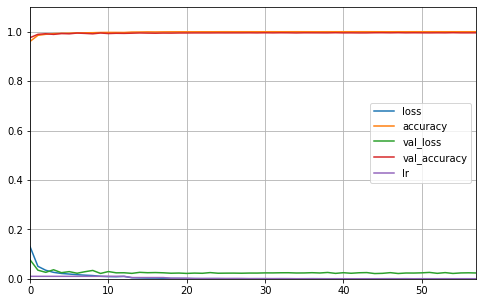

In [41]:
pd.DataFrame(history.history).plot(figsize=(8, 5)) 
plt.grid(True)
plt.gca().set_ylim(0, 1.1) 

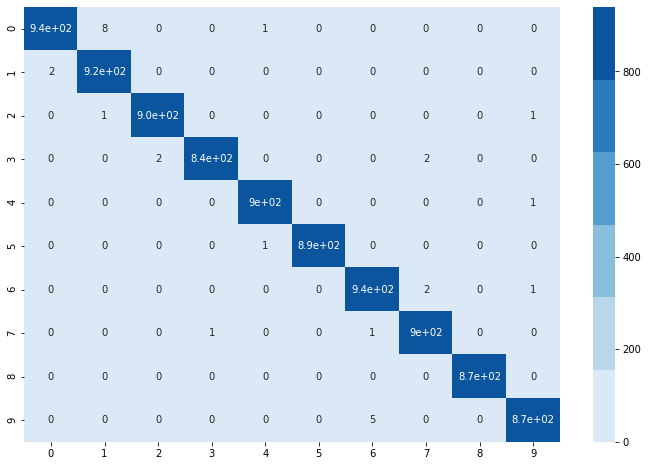

In [42]:
test_pred = model7.predict_classes(X_test)
conf= sklearn.metrics.confusion_matrix(np.argmax(y_test, axis=1),test_pred)
conf=pd.DataFrame(conf,index=range(0,10),columns=range(0,10))
plt.figure(figsize=(12,8))
color = sns.color_palette("Blues")
sns.heatmap(conf, annot=True,cmap=color)

Example of misclassification


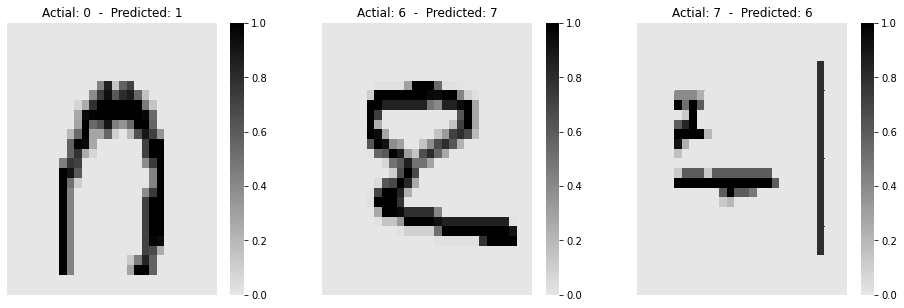

In [43]:
print('Example of misclassification')
f,axes = plt.subplots(1,3,figsize=(16,5),sharex=False)
cmap = sns.cubehelix_palette(50, hue=0.05, rot=0, light=0.9, dark=0, as_cmap=True)
for i in range(len(y_test)):
  if np.argmax(y_test[i], axis=0) == 0:
    if test_pred[i] == 1:
      aux = X_test[i]
      aux = aux.reshape(28,28)
      ax = sns.heatmap(aux, linewidth=0, xticklabels=False, yticklabels=False,cmap=cmap,ax=axes[0])
      ax.set_title('Actial: 0  -  Predicted: 1')
      break
      print(i)
for i in range(len(y_test)):
  if np.argmax(y_test[i], axis=0) == 6:
    if test_pred[i] == 7:
      aux = X_test[i]
      aux = aux.reshape(28,28)
      ax = sns.heatmap(aux, linewidth=0, xticklabels=False, yticklabels=False,cmap=cmap,ax=axes[1])
      ax.set_title('Actial: 6  -  Predicted: 7')
      break
      print(i)
for i in range(len(y_test)):
  if np.argmax(y_test[i], axis=0) == 7:
    if test_pred[i] == 6:
      aux = X_test[i]
      aux = aux.reshape(28,28)
      ax = sns.heatmap(aux, linewidth=0, xticklabels=False, yticklabels=False,cmap=cmap,ax=axes[2])
      ax.set_title('Actial: 7  -  Predicted: 6')
      break
      print(i)


![title](https://www.researchgate.net/profile/Ravindra_Hegadi/publication/274248237/figure/fig1/AS:391846011392003@1470434777393/Kannada-digits-their-equivalent-english-digits.png)

Visualizing these error, it is clear that this model is better.

# ***Prediction***
---



In [44]:
y_pred = model7.predict_classes(Test_Dataset.values.reshape(Test_Dataset.values.shape[0], 28, 28,1))
print(y_pred[:5])
ID = pd.read_csv("/content/test.csv", low_memory=False)
pred_file = pd.DataFrame({"id":ID['id'], "label":y_pred})
pred_file=pred_file.set_index('id')
from google.colab import files
pred_file.to_csv('/content/finalModel.csv')
files.download('/content/finalModel.csv')

[0 1 2 3 4]


In [45]:
pred_file.head(10)

,label
id,
60001,0
60002,1
60003,2
60004,3
60005,4
60006,5
60007,6
60008,7
60009,8


# ***Reflections and Conclusion***
---



The inclusion of convolution layers in the model showed an exciting increase in the performance of the system; this is reasonable since this layer allows the model to determine different features of the image in different sections of it. In turn, it makes the model more robust against variations in the size of these features.
Also, the inclusion of transformations to the inputs (random image rotation) increased the model predictive power; it allows the model to detect these features even if they are rotated.
On the other hand, one would expect that the inclusion of noise layers (with a small value) would provide greater robustness to the model, but this did not happen in any of the generated models.
Regarding regularizer, the inclusion of dropout layers proved to be an exciting option, increasing the performance of the model, unlike the l1 and l2 regularization, which did not happen.
We also expected that the inclusion of batch normalization after each convolutional layer and the reduction of the learning rate (decreasing learning rate during the training to reach the global minimum efficiently), would give the model more excellent stability and performance, making it converge faster and reach a global minimum, but that was not the case (see results generated by models).
Finally, regarding the results generated by the models, it shows an outstanding performance, achieving an accuracy of over 99.56% in validation set and 99.68% in test dataset. (97.7% accuracy over Kaggle dataset). Furthermore, it would have been interesting to see how the inclusion of different convolutional layers that work in parallel with different parameters would influence model like GoogLeNet, which in 2014 proved to be a very efficient model.